# Phillips' HIV Model

The system of differential equations defined in Phillips' HIV model are as follows:
   \begin{equation} dRdt=(\Gamma*\tau)-(\beta*V(t)*R(t))-(\mu*R(t))\end{equation}
   \begin{equation} dLdt=(\beta*V(t)*R(t)*p)-(\mu*L(t))-(\alpha*L(t)) \end{equation}
   \begin{equation} dEdt=(\beta*V(t)*R(t)*(1-p))+(\alpha*L(t))-(\delta*E(t))\end{equation}
   \begin{equation} dVdt=(\pi*E(t))-(\sigma*V(t))\end{equation}

Where: 
 1. the number of susceptible CD4 cells, R(t). 
 2. the number of latently infected CD4 cells, L(t).
 3. the number of actively infected CD4 cells, E(t). and 
 4. the number of virions in the blood stream, V(t).
 1. gamma : Rate of CD4 cell production in our body.
 2. tau : Fraction of produced CD4 cells becoming susceptible to HIV attack.
 3. mu : Natural Death rate of CD4 cells both which are not infected and latently infected.(per cell per day)
 4. beta : Rate of infection of CD4 cells per virion.(per cell per day)
 5. p : Proportion of CD4 cells becoming latently infected upon infection
 6. alpha : Activation rate of latently infected cells.(per cell per day)
 7. sigma : Removal rate of virus from the body
 8. delta : Removal rate of actively infected cells
 9. pi : Rate of production of virions by an actively infected cell
 
Solutions of the model in python will be obtained using the odeint function from scipy.integrate library. we will plot the solutions to reproduce the graphs published in phillips' paper "Reduction of HIV concentration during acute infection: Independence from a specific immune response".   





# Code in Python


In [119]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="View Raw Code"></form>''')

In [1]:
#import libraries 
from scipy . integrate import odeint
import numpy as np
import matplotlib . pyplot as plt

# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'




In [3]:
#model parameters, (All the rates are per day):
gamma=1.36          #Rate of CD4 cell production
mu=0.00136          #Death rate of CD4 cells which are not infected/latently infected
tau=0.2             #Fraction of cells becoming susceptible to HIV attack
beta=0.00027        #Rate of infection of cells per virion
p=0.1               #Proportion of cells becoming latently infected upon infection
alpha=0.036          #Activation rate of latently infected cells
sigma=2.0           #Removal rate of cell free virus
delta=0.33          #Removal rate of actively infected cells
pi=100.0            #Rate of production of virions by an actively infected cell

# Define the timeline over which we want to observe out model
t=np.linspace(0,120,10000)

#Initial Conditions

R=200                           #Initial count of Susceptible CD4 cells
L=0                             #Initial count of latently infected cells
E=0                             #Initial count of actively infecetd cells
CD4 = 1000*(1-tau) + R + L + E  #Initial count of CD4 cells 1000*(1-tau) -> 1000 is the average number of CD4 cells per mm3 of blood. (1-tau)fractions of the cells which are immune to the virus and don't get infected.
V=0.0000004                #Initial count of virions
init0=[R,L,E,V]


## Build Function
def hiv(y,t):
    R,L,E,V=y
    dRdt=(gamma*tau)-(beta*V*R)-(mu*R)
    dLdt=(beta*V*R*p)-(mu*L)-(alpha*L)
    dEdt=(beta*V*R*(1-p))+(alpha*L)-(delta*E)
    dVdt=(pi*E)-(sigma*V)
    return [dRdt,dLdt,dEdt,dVdt]

## compute Model solutions    
soln = odeint(hiv,init0,t)

## Extract solutions for individual variables
r_sol = soln[:,0]
l_sol = soln[:,1]
e_sol = soln[:,2]
v_sol = soln[:,3]

## total CD4 count including infected and non infected cd4 cells.
cd4_total = (1000*(1-tau))+r_sol+l_sol+e_sol

As plotted in the paper published by Phillips, we will plot two graphs to visualize the solutions of the system of differential equations for the first 120 days. The First graph will show the temporal changes in the number of total CD4 lymphocytes (CD4 cells) and free virions (V). The second graph shows the changes in the suceptiable lymphocytes (R), latently infected cells (L),and actively infected cells (E).

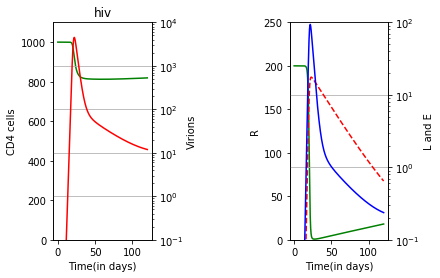

In [5]:
ax1=plt.subplot(1,3,1)                              #Create the first subplot as ax1
ax1.plot(t,cd4_total,'g',label='CD4 cells count')   #Plot the CD4 graph
ax1.set_xlabel('Time(in days)')                     #Labeling the x-axis
ax1.set_ylabel('CD4 cells')                         #Labling the first y-axis
ax1.set_ylim(0,1100)                                #setting the limit of first y-axis to compare with plots in phillips' model  
ax2=ax1.twinx()                                     #Create a twin y axis object sharing x-axis
ax2.semilogy(t,v_sol,'r',label='Virions')           #plot the free virions graph with a log y scale
ax2.set_ylim(0.1,10000)                             #setting the limit of second y-axis to compare with plots in phillips' model
ax2.set_ylabel('Virions')#Labeling the second y-axis
title= ax2.set_title('hiv')
plt.grid()



ax3 = plt.subplot(1,3,3)                                                # Create the second subplot as ax3 
ax3.plot(t,r_sol,'g',label='activated, uninfected CD4 lymphocytes (R)') #Plot the suceptiable cells(R)
ax3.set_xlabel('Time(in days)')                                         # labeling the x axis
ax3.set_ylabel('R')                                                     #labeling the first y-axis R
ax3.set_ylim(0,250)                                                     #y-axis limits 
ax4=ax3.twinx()                                                         #Create a twin y axis object sharing x-axis
ax4.semilogy(t,l_sol,'--r',label = 'latently infected cells (L)') # plot the latently infected cells with log y scale
ax4.semilogy(t,e_sol,'b',label = 'actively infected cells (L)') #plot the actively infeted cells with log y scale
ax4.set_ylim(0.1,100)                                           #  second y-axis limits
ax4.set_ylabel('L and E')                                       # second y-axis  labels
plt.grid()

plt.savefig('Original Plots')                                   #save the figure



#  Changing  $\Gamma$

An interesting investigation to make is to see how changing the rate of CD4 cell production in the body could possibly change the solutions of our model. For this we will look into three different values of Gamma scaled by factors of 10, 100 and 1000. We obtain four different solutions to our model with scaled gamma values while other model parameters remain unchanged. We will look into how the CD4 cell count and Virion count solutions respond to the change in gamma values. 

In [123]:
gamma_value_scales = [1,10,100,1000] #list of scale factors 
soln_list = [] # empty list to store solutions obtained for four diffferent gamma values
for i in gamma_value_scales:
    original_gama = 1.36
    gamma = original_gama*i # scaled value 
    soln = odeint(hiv,init0,t) #compute solution with new gamma value
    soln_list.append(soln)
       
#original soln:
## Extract solutions for individual variables
r_sol = soln_list[0][:,0]
l_sol = soln_list[0][:,1]
e_sol = soln_list[0][:,2]
v_sol = soln_list[0][:,3]
## total CD4 count including infected and non infected cd4 cells.
cd4_total = (1000*(1-tau))+r_sol+l_sol+e_sol


##First scale 10
## Extract solutions for individual variables
r_sol_1 = soln_list[1][:,0]
l_sol_1 = soln_list[1][:,1]
e_sol_1 = soln_list[1][:,2]
v_sol_1 = soln_list[1][:,3]
## total CD4 count including infected and non infected cd4 cells.
cd4_total_1 = (1000*(1-tau))+r_sol_1+l_sol_1+e_sol_1

##Second scale 100
## Extract solutions for individual variables
r_sol_2 = soln_list[2][:,0]
l_sol_2 = soln_list[2][:,1]
e_sol_2 = soln_list[2][:,2]
v_sol_2 = soln_list[2][:,3]
## total CD4 count including infected and non infected cd4 cells.
cd4_total_2 = (1000*(1-tau))+r_sol_2+l_sol_2+e_sol_2

##Third Scale 1000
## Extract solutions for individual variables
r_sol_3 = soln_list[3][:,0]
l_sol_3 = soln_list[3][:,1]
e_sol_3 = soln_list[3][:,2]
v_sol_3 = soln_list[3][:,3]
## total CD4 count including infected and non infected cd4 cells.
cd4_total_3 = (1000*(1-tau))+r_sol_3+l_sol_3+e_sol_3
print(min(cd4_total))
    

812.1856275490894


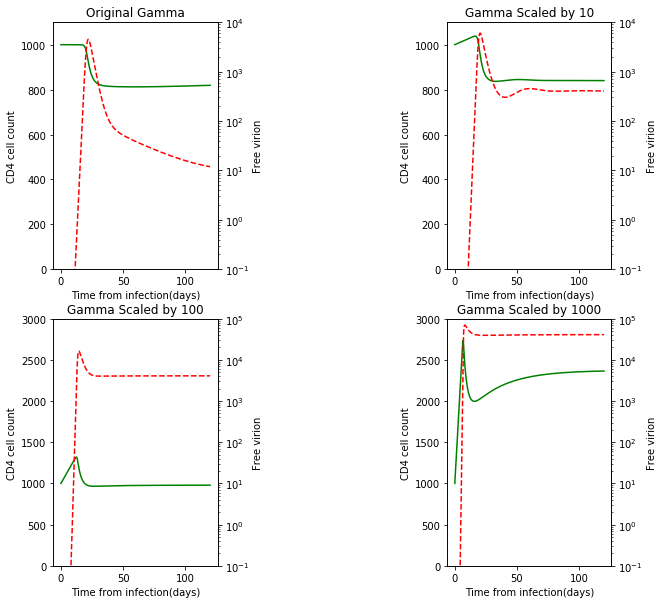

In [124]:
##CD4 plots VS Virion Plots
ax1=plt.subplot(2,3,1)                              
ax1.plot(t,cd4_total,'g',label='CD4 cell count')
ax1.set_ylim(0,1100)
ax1.set_xlabel('Time from infection(days)')
ax1.set_ylabel('CD4 cell count')
ax2=ax1.twinx()
ax2.semilogy(t,v_sol,'--r',label='virion')

ax2.set_ylim(0.1,10000)
ax2.set_ylabel('Free virion')
plt.title('Original Gamma')

ax3=plt.subplot(2,3,3)
ax3.plot(t,cd4_total_1,'g',label='CD4 cell count')
ax3.set_ylim(0,1100)
ax3.set_xlabel('Time from infection(days)')
ax3.set_ylabel('CD4 cell count')
ax4=ax3.twinx()
ax4.semilogy(t,v_sol_1,'--r',label='virion')
ax4.set_ylim(0.1,10000)
ax4.set_ylabel('Free virion')
plt.title('Gamma Scaled by 10')

ax5=plt.subplot(2,3,4)
ax5.plot(t,cd4_total_2,'g',label='CD4 cell count')
ax5.set_ylim(0,3000)
ax5.set_xlabel('Time from infection(days)')
ax5.set_ylabel('CD4 cell count')
ax6=ax5.twinx()
ax6.semilogy(t,v_sol_2,'--r',label='virion')
ax6.set_ylim(0.1,100000)
ax6.set_ylabel('Free virion')
plt.title('Gamma Scaled by 100')

ax7=plt.subplot(2,3,6)
ax7.plot(t,cd4_total_3,'g',label='CD4 cell count')
ax7.set_ylim(0,3000)
ax7.set_xlabel('Time from infection(days)')
ax7.set_ylabel('CD4 cell count')
ax8=ax7.twinx()
ax8.semilogy(t,v_sol_3,'--r',label='virion')
ax8.set_ylim(0.1,100000)
ax8.set_ylabel('Free virion')
plt.title('Gamma Scaled by 1000')

plt.savefig('Gamma scale Plots')

It can be observed from the plots: 
- that the virion count does drop during the first few weeks from infection. But, the order of magnitude of the drop is decreasing with increase in the value of $\Gamma$. 
- Increasing The value of $\Gamma$ shows increase in CD4 count for the first few weeks from infection before the count starts decreasing again. 
- It is also interesting to observe that the decrease in the virion count and the CD4 cell count happen around the same time frame. As $\Gamma$ increases the day when both the CD4 and Virion count have the minimum value seem to coinside.

These observations give us an possible indication that as observed by phillips; the reduction in virions in the first few weeks from infection does not reflect response from the immune system to control the virus replication but reflect the availability of CD4 cells for virus replication.